In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import warnings

In [4]:
data = pd.read_csv('german_credit_data.csv')

In [5]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


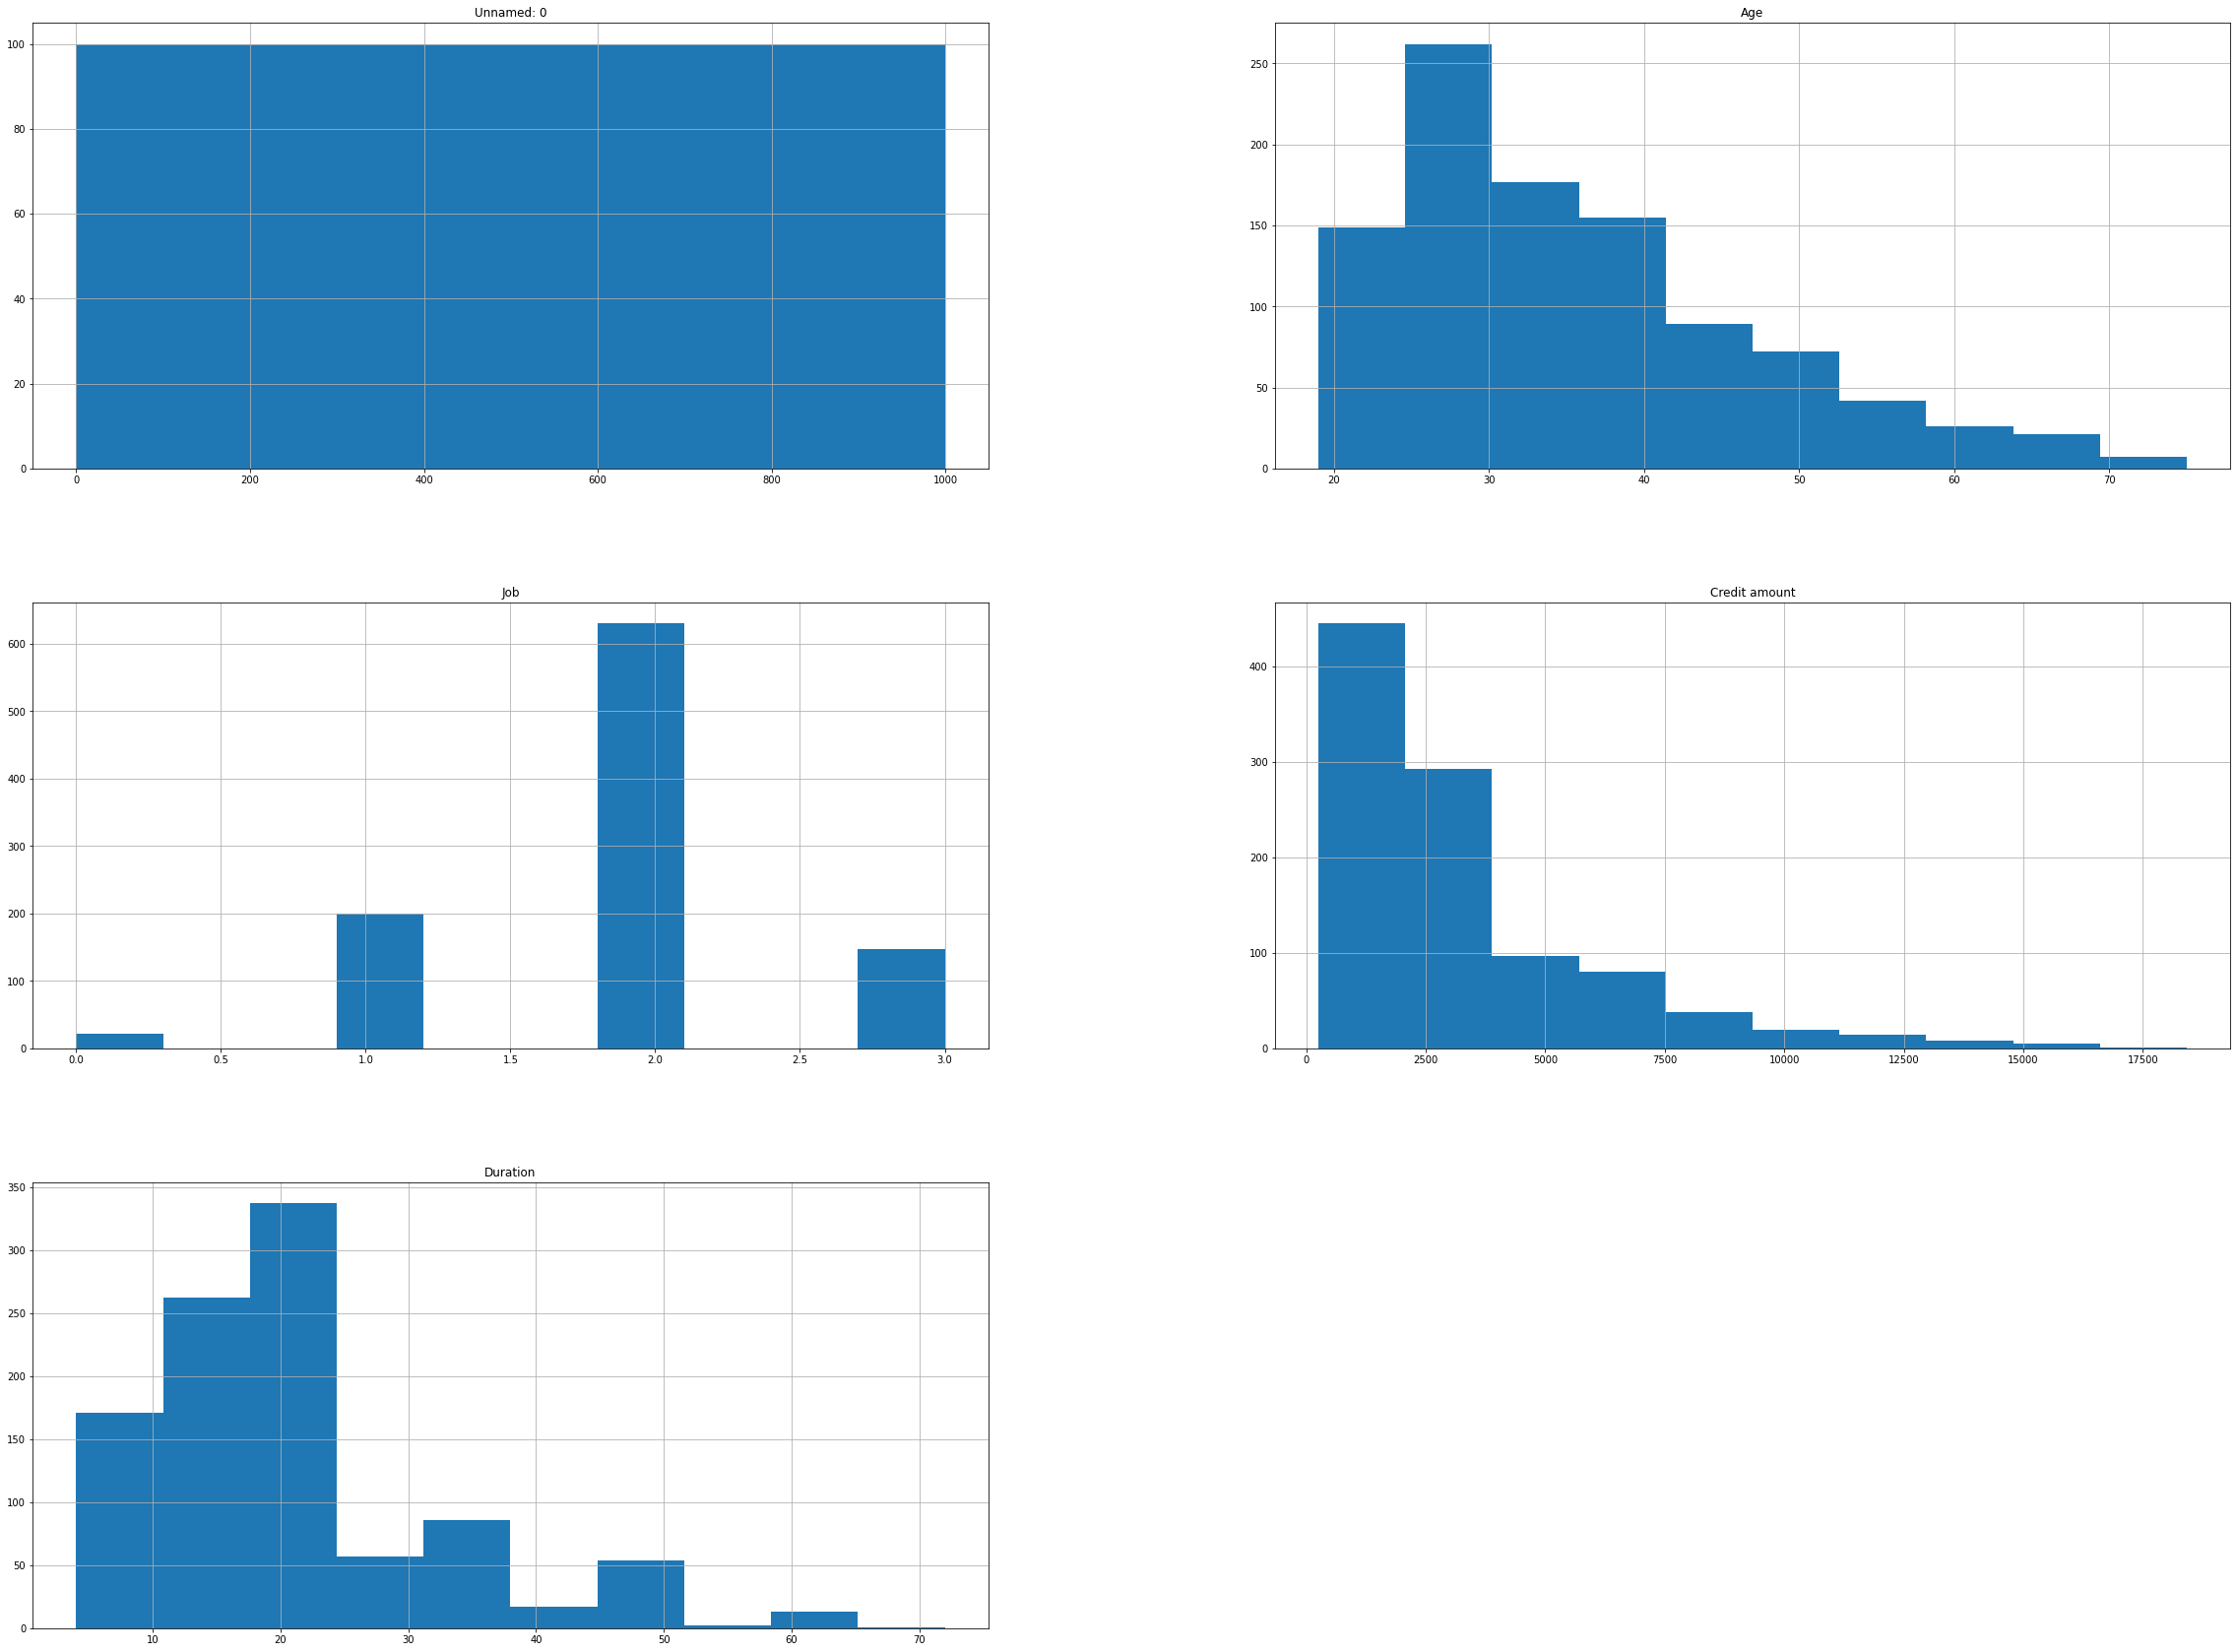

In [7]:
data.hist(figsize=(40,30));

C:\Users\099\AppData\Local\Temp/ipykernel_21056/4216924255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');


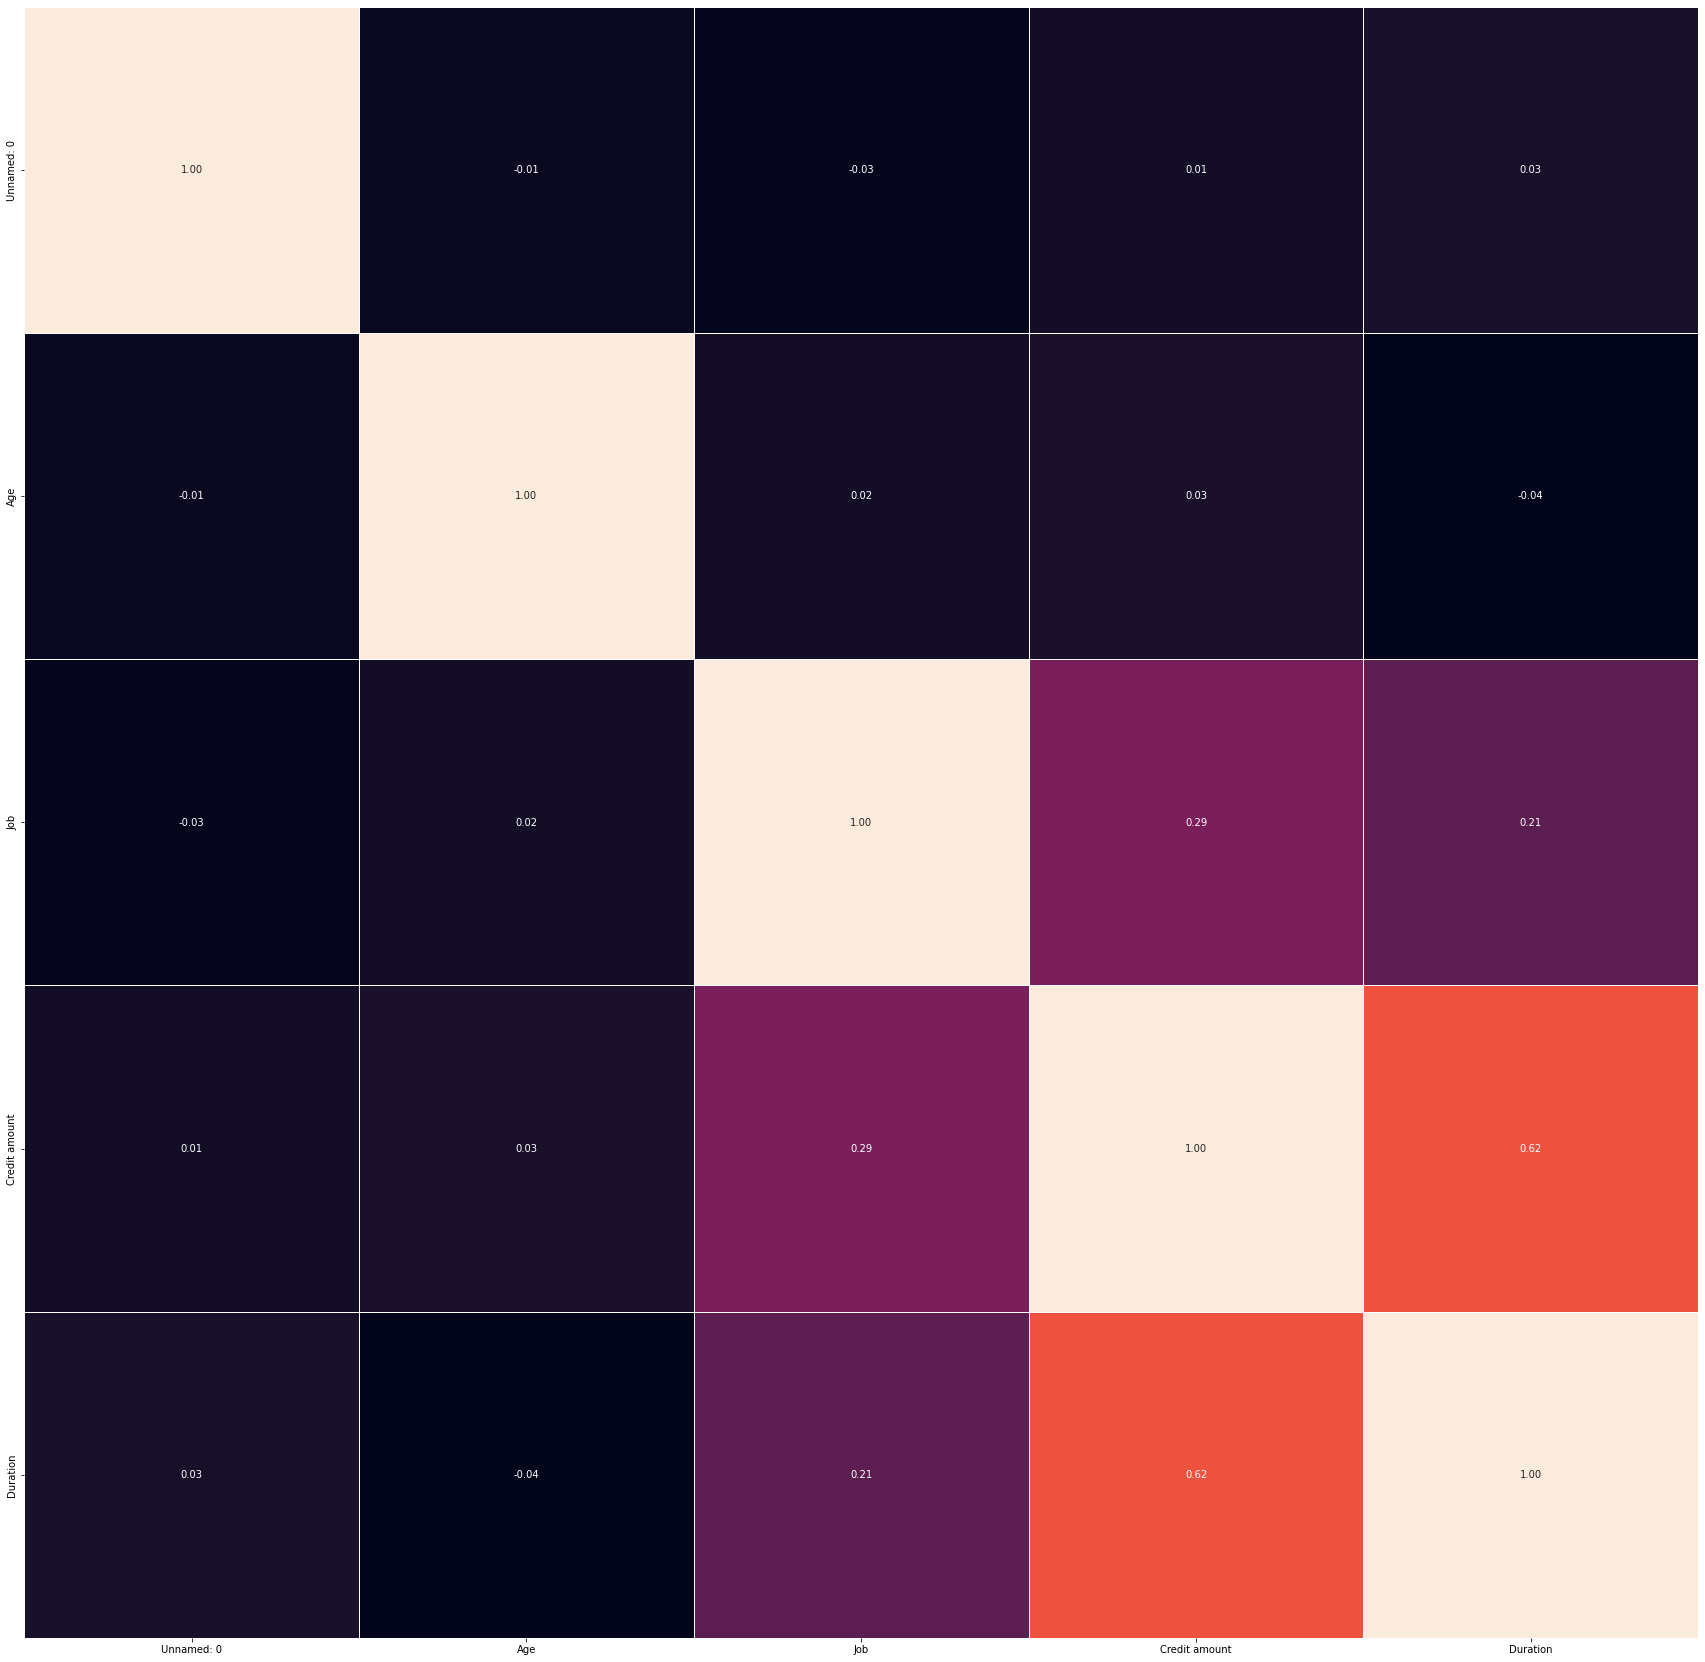

In [8]:
plt.figure(figsize=(30, 30));
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f');
plt.show();

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [10]:
#data = data.fillna()

In [11]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [12]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
data["Sex"] = lenc.fit_transform(data["Sex"])
data["Housing"] = lenc.fit_transform(data["Housing"])
data["Saving accounts"] = lenc.fit_transform(data["Saving accounts"])
data["Checking account"] = lenc.fit_transform(data["Checking account"])

In [13]:
from category_encoders import OneHotEncoder
enc = OneHotEncoder()

data = data.drop(['Purpose'], axis = 1).join(enc.fit_transform(data[['Purpose']], axis = 0))

In [14]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
0,0,67,1,2,1,4,0,1169,6,1,0,0,0,0,0,0,0
1,1,22,0,2,1,0,1,5951,48,1,0,0,0,0,0,0,0
2,2,49,1,1,1,0,3,2096,12,0,1,0,0,0,0,0,0
3,3,45,1,2,0,0,0,7882,42,0,0,1,0,0,0,0,0
4,4,53,1,2,0,0,0,4870,24,0,0,0,1,0,0,0,0


In [18]:
data_ns = data.copy(deep=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = scaler.fit_transform(data)

## Kmeans

In [19]:
inertia = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(data)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\099\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\099\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\099\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\099\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

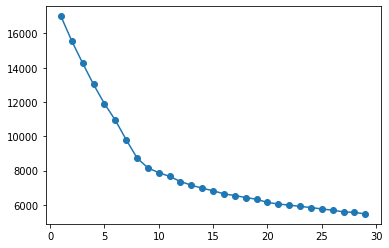

In [20]:
plt.plot(range(1,30), inertia, marker='o');

In [21]:
D = []
for i in range(1,28):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)

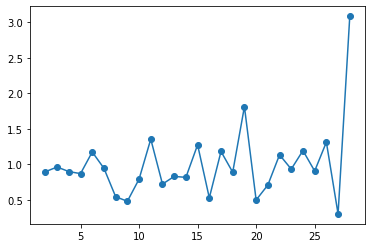

In [22]:
plt.plot(range(2,29), D, marker='o');

In [23]:
kmeanModel = KMeans(n_clusters=9).fit(data)
labels = kmeanModel.labels_

C:\Users\099\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(data)

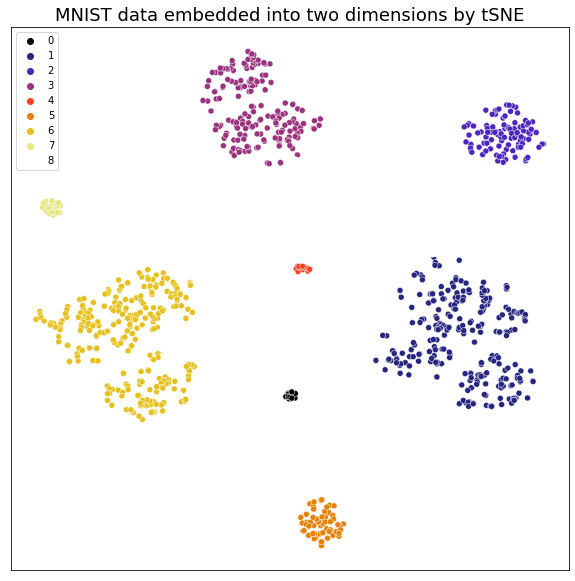

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=kmeanModel.labels_.astype(int), 
    palette="CMRmap",
    legend='full'
)
plt.title("MNIST data embedded into two dimensions by tSNE", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

In [30]:
df = pd.DataFrame(data_ns)
df.groupby(labels).mean()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
0,498.916667,34.250000,0.500000,1.750000,1.166667,1.416667,1.333333,1498.000000,16.833333,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0
1,527.976190,36.365079,0.686508,1.761905,1.150794,1.265873,1.587302,2369.019841,16.170635,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
2,483.587629,35.484536,0.804124,1.907216,1.113402,1.020619,1.659794,4158.041237,26.938144,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0
3,498.387640,32.286517,0.584270,1.915730,1.219101,0.820225,1.337079,2954.747191,18.893258,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
4,424.666667,39.916667,0.750000,2.500000,0.666667,0.833333,0.833333,8209.333333,32.333333,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
5,463.898305,38.288136,0.593220,1.847458,0.915254,1.305085,1.627119,2879.203390,19.677966,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0
6,491.955390,34.940520,0.691450,1.862454,1.089219,1.044610,1.802974,2205.327138,18.657993,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,475.318182,38.545455,0.772727,1.500000,0.954545,0.863636,1.500000,2728.090909,19.090909,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0
8,500.838384,38.353535,0.828283,2.424242,0.666667,1.383838,1.393939,8135.131313,36.989899,0.111111,0.0,0.030303,0.858586,0.0,0.0,0.0,0.0


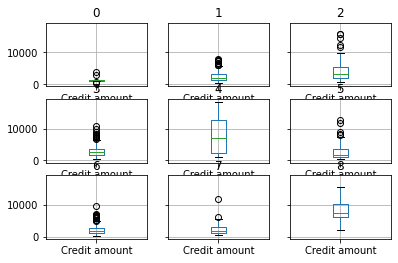

In [35]:
boxplot = df.groupby(labels).boxplot(column=['Credit amount'])

#### По графикам видно, что средние значения признака возрастают от нулевого кластера к 4-ому, затем происходит "падение" среднего значения, и снова рост от 5-го кластера к 8-ому

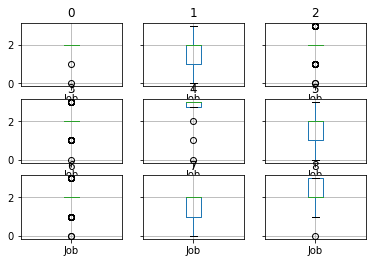

In [36]:
boxplot = df.groupby(labels).boxplot(column=['Job'])

#### Практически аналогичная картина наблюдается с признаком 'Job'

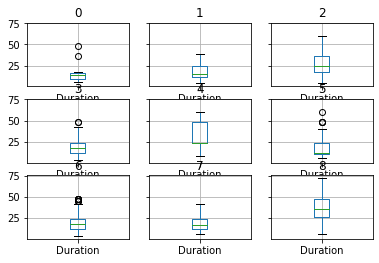

In [37]:
boxplot = df.groupby(labels).boxplot(column=['Duration'])

#### Аналогично для признака 'Duration' пики значений приходятся на 4 и 8 кластер.

## Hierarhical

In [38]:
silhouette = []
for i in tqdm(range(2,30)):
    agg = AgglomerativeClustering(n_clusters=i).fit(data)
    labels = agg.labels_
    score = silhouette_score(data, labels)
    silhouette.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 17.52it/s]


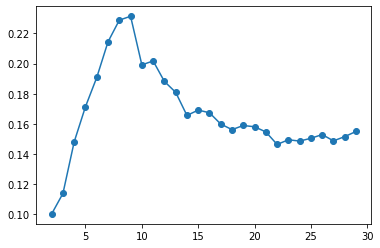

In [39]:
plt.plot(range(2,30), silhouette, marker='o');

In [40]:
agg = AgglomerativeClustering(n_clusters=10).fit(data)
labels = agg.labels_

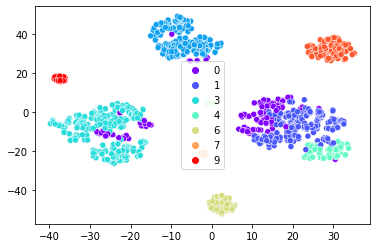

In [41]:
sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=labels, palette='rainbow');

In [42]:
df = pd.DataFrame(data_ns)
df.groupby(labels).mean()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
0,479.358333,37.058333,0.791667,2.300000,0.675000,1.066667,1.266667,7003.666667,37.041667,0.25,0.0,0.058333,0.691667,0.0,0.0,0.0,0.0
1,536.549738,38.617801,0.910995,1.790576,1.094241,1.350785,1.790576,2785.329843,15.942408,0.00,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
2,491.821839,32.563218,0.603448,1.890805,1.206897,0.821839,1.298851,2843.994253,18.465517,0.00,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0
3,503.508000,35.264000,0.684000,1.852000,1.096000,1.060000,1.832000,2017.592000,16.944000,1.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,511.492063,28.603175,0.000000,1.841270,1.460317,1.412698,1.317460,2378.698413,18.730159,0.00,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0
5,424.666667,39.916667,0.750000,2.500000,0.666667,0.833333,0.833333,8209.333333,32.333333,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
6,463.898305,38.288136,0.593220,1.847458,0.915254,1.305085,1.627119,2879.203390,19.677966,0.00,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,498.916667,34.250000,0.500000,1.750000,1.166667,1.416667,1.333333,1498.000000,16.833333,0.00,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0
8,483.587629,35.484536,0.804124,1.907216,1.113402,1.020619,1.659794,4158.041237,26.938144,0.00,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0
9,475.318182,38.545455,0.772727,1.500000,0.954545,0.863636,1.500000,2728.090909,19.090909,0.00,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0


In [43]:
#boxplot = df.groupby(labels).boxplot(column=[0, 1, 2, 3, 4])

## Dbscan

In [44]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,10,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(data)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(data, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:06<00:00, 15.54it/s]


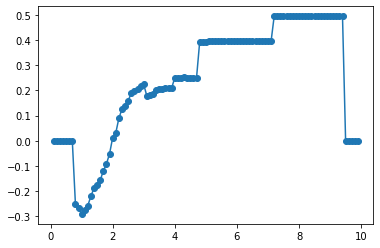

In [45]:
plt.plot(eps_range, silhouette, marker='o');

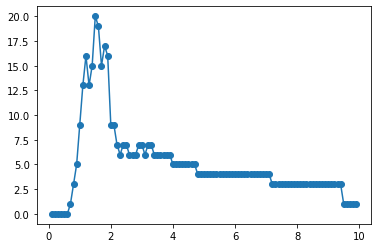

In [46]:
plt.plot(eps_range, clusters, marker='o');

In [47]:
dbscan = DBSCAN(eps=3).fit(data)
labels = dbscan.labels_

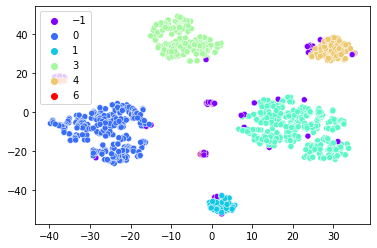

In [48]:
sns.scatterplot(x=tsne_transformed[:,0], y=tsne_transformed[:,1], hue=labels, palette='rainbow');

In [49]:
df = pd.DataFrame(data_ns)
df.groupby(labels).mean()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
-1,440.000000,43.520000,0.560000,1.940000,0.980000,1.560000,1.180000,7042.760000,31.360000,0.06,0.08,0.02,0.18,0.18,0.12,0.12,0.24
0,488.758123,34.696751,0.696751,1.866426,1.083032,1.086643,1.805054,2420.584838,19.743682,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,476.563636,38.254545,0.581818,1.836364,0.945455,1.236364,1.672727,2404.709091,18.600000,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,525.618902,36.868902,0.731707,1.945122,1.024390,1.231707,1.548780,3603.317073,20.582317,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,495.766667,32.472222,0.588889,1.916667,1.205556,0.811111,1.322222,3005.255556,19.183333,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,507.306818,33.943182,0.840909,1.920455,1.079545,1.079545,1.715909,3899.500000,25.784091,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
5,472.250000,33.437500,0.812500,1.625000,1.000000,0.625000,1.437500,2759.812500,18.562500,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
6,343.833333,32.500000,0.666667,1.833333,1.000000,0.500000,1.000000,1035.333333,12.166667,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [50]:
#boxplot = df.groupby(labels).boxplot(column=[0, 1, 2, 3, 4])